In [27]:
import seaborn as sns  
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split as tts 
from sklearn.svm import LinearSVR as lsvr 
from sklearn.dummy import DummyRegressor 
from sklearn.metrics import mean_squared_error

In [2]:
source = "./MICRODADOS_ENEM_2019_SAMPLE_43278.csv"   
dados = pd.read_csv(source)

In [3]:
provas=["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO"]  
provas_entrada= ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_LC","NU_NOTA_REDACAO"]  
provas_saida = "NU_NOTA_MT" 
dados["NU_NOTA_TOTAL"] = dados[provas].sum(axis=1)  
provas.append("NU_NOTA_TOTAL")

In [4]:
dados_sem_notas_zero = dados.query("NU_NOTA_TOTAL != 0")  
dados_sem_notas_zero = dados_sem_notas_zero[provas].dropna()
notas_entrada = dados_sem_notas_zero[provas_entrada] 
notas_saida = dados_sem_notas_zero[provas_saida]

In [5]:
x = notas_entrada 
y = notas_saida

In [6]:
tts(x,y)

[        NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_REDACAO
 54621        379.1       421.4       462.2            360.0
 5465         377.6       498.7       535.4            560.0
 63023        496.1       389.5       472.3            680.0
 34458        536.9       568.3       523.2            900.0
 88537        352.1       439.1       533.7            760.0
 ...            ...         ...         ...              ...
 109433       440.6       457.4       539.5            480.0
 21797        494.7       455.6       471.9            380.0
 102934       501.7       569.5       531.9            460.0
 50195        578.4       607.5       584.6            920.0
 25982        410.6       463.8       542.5            500.0
 
 [69402 rows x 4 columns],
         NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_REDACAO
 84694        505.3       591.9       574.8            780.0
 34551        348.8       442.3       444.7            480.0
 7551         589.6       579.1       579.2            8

In [7]:
SEED=0
x_treino, x_teste, y_treino,y_teste = tts(x,y, test_size =0.25, random_state = SEED )

In [8]:
x_treino.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO
92248,604.4,645.3,595.5,980.0
86057,531.6,558.7,534.3,920.0
55061,512.3,627.6,584.3,880.0
120165,495.4,560.0,534.9,540.0
56853,369.0,533.1,487.3,460.0


In [9]:
modelo = lsvr(random_state = 0,max_iter=1000) 

modelo.fit(x_treino, y_treino)

C:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVR(random_state=0)

In [10]:
predicoes_matematica = modelo.predict(x_teste)

In [11]:
y_teste[:5]

4984      372.7
18022     513.6
93468     602.2
44286     618.7
117917    539.0
Name: NU_NOTA_MT, dtype: float64

(-50.0, 1050.0)

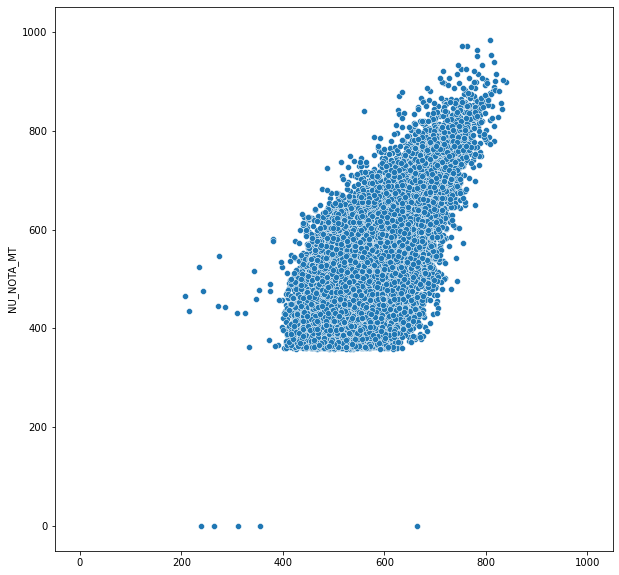

In [12]:
plt.figure(figsize=(10,10)) 
sns.scatterplot(x = predicoes_matematica, y=y_teste)
plt.xlim((-50,1050)) 
plt.ylim((-50,1050))

<AxesSubplot:xlabel='NU_NOTA_MT', ylabel='NU_NOTA_MT'>

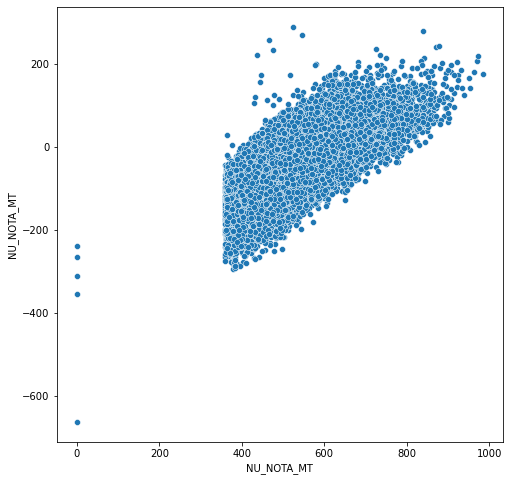

In [13]:
plt.figure(figsize=(8,8 )) 
sns.scatterplot(x = y_teste, y=y_teste-predicoes_matematica) 
#plt.xlim((-50,1050)) 
#plt.ylim((-50,1050))

<AxesSubplot:xlabel='NU_NOTA_MT'>

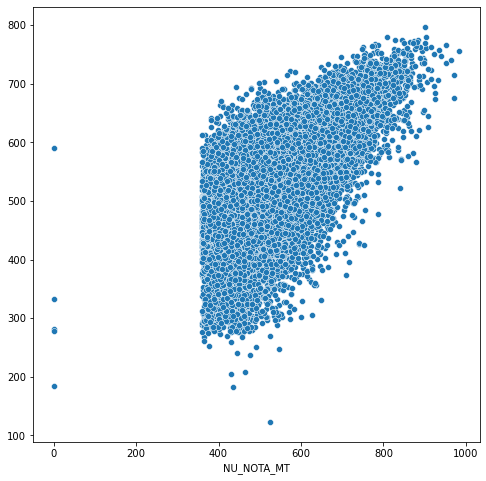

In [14]:
plt.figure(figsize=(8,8)) 
sns.scatterplot(x=y_teste, y=x_teste.mean(axis=1))

In [18]:
resultados = pd.DataFrame() 
resultados["Real"] = y_teste 
resultados["Previsão"] = predicoes_matematica 
resultados["diferenca"] = resultados["Real"] - resultados["Previsão"] 
resultados["quadrado_diferenca"] = (resultados["Real"] - resultados["Previsão"])**2

In [19]:
resultados


,Real,Previsão,diferenca,quadrado_diferenca
4984,372.7,504.408009,-131.708009,17346.999722
18022,513.6,540.449402,-26.849402,720.890399
93468,602.2,638.850720,-36.650720,1343.275309
44286,618.7,606.266743,12.433257,154.585873
117917,539.0,555.234984,-16.234984,263.574716
...,...,...,...,...
1659,609.3,671.649147,-62.349147,3887.416126
123389,512.3,621.592686,-109.292686,11944.891298
25160,539.1,467.024118,72.075882,5194.932759
29817,375.9,524.396695,-148.496695,22051.268474


In [20]:
resultados["quadrado_diferenca"].mean()

8326.795090241418

In [21]:
resultados["quadrado_diferenca"].mean()**(1/2)

91.2512744581763

In [23]:
modelo_dummy = DummyRegressor() 
modelo_dummy.fit(x_treino, y_treino) 
dummy_predicoes = modelo_dummy.predict(x_teste) 

In [30]:
mean_squared_error(y_teste, dummy_predicoes) 


11970.141187483548

In [31]:
mean_squared_error(y_teste, predicoes_matematica)

8326.795090241485